<h1>Plot results</h1>
<p>This notebook plots the results of analysis with DANS and UNS that were extracted by the extractResults notebook.</p>

In [79]:
import pandas as pd

In [91]:
df = pd.read_csv("results/string_results.csv")

In [92]:
graph_methods = {'First-order LINE', 'DeepWalk SkipGram', 'Walklets CBOW', 'HOPE',
                 'Second-order LINE','DeepWalk CBOW',    'Walklets SkipGram'}
df = df[df['features_names'].isin(graph_methods)]
df =  df.rename(columns={"evaluation_negative_sampling_method": "evaluation", 
                   "evaluation_mode": "mode","features_names":"methods"}, errors="raise")

In [93]:
evaluation_d = {'balanced_accuracy':['mean','std'],
               'false_discovery_rate':['mean','std'], 
               'matthews_correlation_coefficient':['mean','std'], 
               'f1_score':['mean','std'], 
               'auroc':['mean','std'], 
               'auprc':['mean','std']}

In [94]:
df.head()

,Unnamed: 0,mode,methods,evaluation,model_negative_examples,accuracy,balanced_accuracy,false_discovery_rate,matthews_correlation_coefficient,precision,recall,specificity,f1_score,auroc,auprc
22,24,train,Second-order LINE,DANS,DANS,0.920585,0.920586,0.074124,0.841235,0.925876,0.914392,0.926779,0.920098,0.973088,0.972425
23,25,test,Second-order LINE,DANS,DANS,0.887979,0.887983,0.078962,0.778361,0.921038,0.848746,0.927220,0.883415,0.949855,0.954866
24,28,train,DeepWalk CBOW,DANS,DANS,0.831433,0.831437,0.147626,0.664041,0.852374,0.801765,0.861108,0.826295,0.904027,0.911607
25,29,test,DeepWalk CBOW,DANS,DANS,0.794118,0.794125,0.158855,0.593907,0.841145,0.725244,0.863005,0.778907,0.866211,0.875570
30,36,train,Second-order LINE,UNS,DANS,0.936722,0.936723,0.041095,0.874467,0.958905,0.912558,0.960889,0.935157,0.979126,0.981374


In [95]:
df2 = df.groupby(['methods','mode','evaluation']).agg(evaluation_d).reset_index()

In [96]:
df2.head()

methods   mode evaluation balanced_accuracy            \
                                                    mean       std   
0      DeepWalk CBOW   test       DANS          0.822263  0.016802   
1      DeepWalk CBOW   test        UNS          0.854046  0.022612   
2      DeepWalk CBOW  train       DANS          0.874667  0.034289   
3      DeepWalk CBOW  train        UNS          0.906246  0.039640   
4  DeepWalk SkipGram   test       DANS          0.866264  0.017862   

  false_discovery_rate           matthews_correlation_coefficient            \
                  mean       std                             mean       std   
0             0.149725  0.020909                         0.647233  0.032822   
1             0.087340  0.029481                         0.715841  0.044722   
2             0.135235  0.023526                         0.750840  0.069242   
3             0.078987  0.029631                         0.813801  0.078163   
4             0.111139  0.021461                         0.735877  0.030902   

   f1_score               auroc               auprc            
       mean       std      mean       std      mean       std  
0  0.814773  0.019651  0.889122  0.011987  0.875925  0.018466  
1  0.842817  0.025430  0.921659  0.020086  0.918986  0.012448  
2  0.875555  0.036493  0.933964  0.021586  0.912928  0.012512  
3  0.903771  0.042130  0.955888  0.024851  0.945469  0.011945  
4  0.861634  0.024944  0.912387  0.012541  0.869357  0.022232

In [97]:
df2.columns = ["methods",'mode','evaluation', "balanced_acc.mean","balanced_acc.std","FDR.mean",
                    "FDR.std", "MCC.mean", "MCC.std", "F1.mean", "F1.std", "AUROC.mean",
                     "AUROC.std", "AUPRC.mean","AUPRC.std"]


In [98]:
df2.head()

,methods,mode,evaluation,balanced_acc.mean,balanced_acc.std,FDR.mean,FDR.std,MCC.mean,MCC.std,F1.mean,F1.std,AUROC.mean,AUROC.std,AUPRC.mean,AUPRC.std
0,DeepWalk CBOW,test,DANS,0.822263,0.016802,0.149725,0.020909,0.647233,0.032822,0.814773,0.019651,0.889122,0.011987,0.875925,0.018466
1,DeepWalk CBOW,test,UNS,0.854046,0.022612,0.087340,0.029481,0.715841,0.044722,0.842817,0.025430,0.921659,0.020086,0.918986,0.012448
2,DeepWalk CBOW,train,DANS,0.874667,0.034289,0.135235,0.023526,0.750840,0.069242,0.875555,0.036493,0.933964,0.021586,0.912928,0.012512
3,DeepWalk CBOW,train,UNS,0.906246,0.039640,0.078987,0.029631,0.813801,0.078163,0.903771,0.042130,0.955888,0.024851,0.945469,0.011945
4,DeepWalk SkipGram,test,DANS,0.866264,0.017862,0.111139,0.021461,0.735877,0.030902,0.861634,0.024944,0.912387,0.012541,0.869357,0.022232


In [99]:
df2.columns

Index(['methods', 'mode', 'evaluation', 'balanced_acc.mean',
       'balanced_acc.std', 'FDR.mean', 'FDR.std', 'MCC.mean', 'MCC.std',
       'F1.mean', 'F1.std', 'AUROC.mean', 'AUROC.std', 'AUPRC.mean',
       'AUPRC.std'],
      dtype='object')

In [102]:
df2["approach"] = df["evaluation"] + " (" + df["mode"] + ")"

In [106]:
!pip install plotnine
from plotnine import *

ModuleNotFoundError: No module named 'plotnine'

AssertionError: 

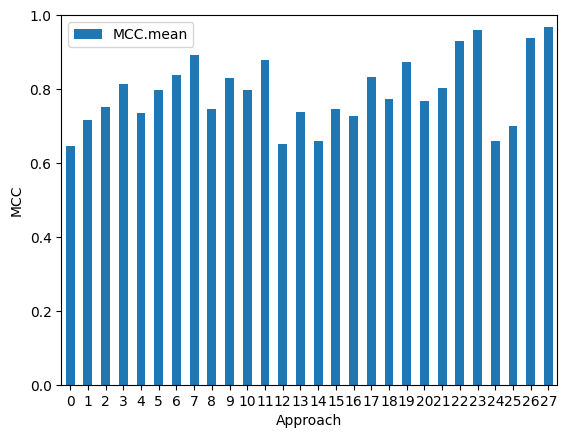

In [104]:
# plot
ax = df2[['approach', 'MCC.mean']].plot.bar(rot=0)
plt.xlabel('Approach')
plt.ylabel('MCC')
plt.ylim(0, 1.0)

# bar_moes[i] is bar/patch i's margin of error, i.e., half the length of an
# errorbar centered at the bar's height
bar_moes = np.ravel(df2[['approach', 'MCC.std']].values.T)
assert len(bar_moes) == len(ax.patches)

for patch, moe in zip(ax.patches, bar_moes):
    height = patch.get_height() # of bar
    min_y, max_y = height - moe, height + moe
    plt.vlines(patch.get_x() + patch.get_width()/2,
               min_y, max_y, color='k')

In [ ]:
def get_ggplot(df, edge_feature, lower_ylim=0):
    df_filtered = df[perceptron_df["edge_features"]==edge_feature]
    p = ggplot(data=df_filtered, mapping=aes(y = "matthews_correlation_coefficient", 
           x = "validation",  fill="evaluation_mode"))  + geom_boxplot()  + \
    ylim(lower_ylim, 1) + \
    theme_bw() +  \
    labs(y= "MCC") + \
    theme(axis_text = element_text(size=18),
         axis_title_x= element_blank(),
          axis_title_y= element_text(size=24),
         legend_title = element_blank(),
         legend_text = element_text(size=24, hjust=1),
         legend_position = (0.35, 0.9))
    return p